## Geofile Visualizations

### Loading in shapefiles

In [1]:
import pandas as pd
import numpy as np

import os
cwd = os.getcwd()
cwd

'/Users/sophiamlawer/ML_project/CAPP-30254-Covid-Variants/notebooks'

In [2]:
import geopandas as gpd

def read_in(geo):
    shapefile = gpd.read_file(geo)
    return shapefile

il_geo = read_in("../Boundaries/IL_BNDY_County/IL_BNDY_County_Py.shp")
print("done")
mo_geo = read_in("../Boundaries/MO_2018_County_Boundaries-shp/MO_2018_County_Boundaries.shp")
print("done")
oh_geo = read_in("../Boundaries/ODOT_County_Boundaries/ODOT_County_Boundaries.shp")


done
done


### Clean IL

In [3]:
il_geo.columns = ["county", "fips", "geometry"]
il_geo["fips"] = il_geo["fips"].astype(str)
il_geo["fips"] = il_geo["fips"].str.pad(width=3, side='left', fillchar='0')
il_geo["fips"] = "17" + il_geo["fips"]
il_geo.drop("county", axis=1, inplace=True)
il_geo

,fips,geometry
0,17111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493..."
1,17007,"POLYGON ((-88.70742 42.49351, -88.70740 42.493..."
2,17141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200..."
3,17197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724..."
4,17099,"POLYGON ((-88.93885 41.62836, -88.93871 41.628..."
...,...,...
97,17081,"POLYGON ((-89.14445 38.47386, -89.12638 38.473..."
98,17101,"POLYGON ((-87.90805 38.85012, -87.88944 38.849..."
99,17121,"POLYGON ((-89.13843 38.73632, -89.13827 38.750..."
100,17181,"POLYGON ((-89.04143 37.59649, -89.04143 37.596..."


### Ohio

In [4]:
oh_geo_clean = oh_geo[["FIPS_COUNT", "geometry"]]
oh_geo_clean.columns = ["fips", "geometry"]
oh_geo_clean

,fips,geometry
0,39071,"POLYGON ((-83.78330 39.26382, -83.78312 39.263..."
1,39073,"POLYGON ((-82.49595 39.60265, -82.49505 39.612..."
2,39075,"POLYGON ((-81.87727 40.66713, -81.87564 40.667..."
3,39077,"POLYGON ((-82.83547 41.14407, -82.83549 41.145..."
4,39049,"POLYGON ((-83.24596 39.96574, -83.24595 39.965..."
...,...,...
83,39163,"POLYGON ((-82.51710 39.36942, -82.51595 39.379..."
84,39165,"POLYGON ((-83.98859 39.44441, -83.98941 39.435..."
85,39067,"POLYGON ((-81.27273 40.36923, -81.27271 40.369..."
86,39129,"POLYGON ((-82.84304 39.56150, -82.84164 39.561..."


### Missouri

In [5]:
mo_geo = mo_geo[["COUNTYFIPS", "geometry"]]
mo_geo.columns = ["fips", "geometry"]
mo_geo["fips"] = "29" + mo_geo["fips"]
mo_geo

,fips,geometry
0,29045,"POLYGON ((-91.72917 40.61371, -91.72120 40.603..."
1,29005,"POLYGON ((-95.20235 40.57847, -95.20239 40.566..."
2,29199,"POLYGON ((-91.94509 40.47537, -91.94526 40.460..."
3,29197,"POLYGON ((-92.35069 40.59327, -92.35076 40.578..."
4,29147,"POLYGON ((-94.60088 40.31487, -94.60131 40.300..."
...,...,...
110,29119,"POLYGON ((-94.07704 36.50209, -94.07703 36.498..."
111,29069,"POLYGON ((-89.95952 36.62857, -89.96002 36.628..."
112,29155,"POLYGON ((-89.67368 36.40043, -89.67240 36.400..."
113,29127,"POLYGON ((-91.73454 39.65748, -91.75336 39.657..."


In [6]:
df = il_geo.append(mo_geo).append(oh_geo_clean)
#df["fips"] = df["fips"].astype(int)
df

,fips,geometry
0,17111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493..."
1,17007,"POLYGON ((-88.70742 42.49351, -88.70740 42.493..."
2,17141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200..."
3,17197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724..."
4,17099,"POLYGON ((-88.93885 41.62836, -88.93871 41.628..."
...,...,...
83,39163,"POLYGON ((-82.51710 39.36942, -82.51595 39.379..."
84,39165,"POLYGON ((-83.98859 39.44441, -83.98941 39.435..."
85,39067,"POLYGON ((-81.27273 40.36923, -81.27271 40.369..."
86,39129,"POLYGON ((-82.84304 39.56150, -82.84164 39.561..."


In [7]:
df.to_csv('../Data/geofiles.csv', index = False)

### Link with Main File

Looking at the general outline of the states with no data attached:

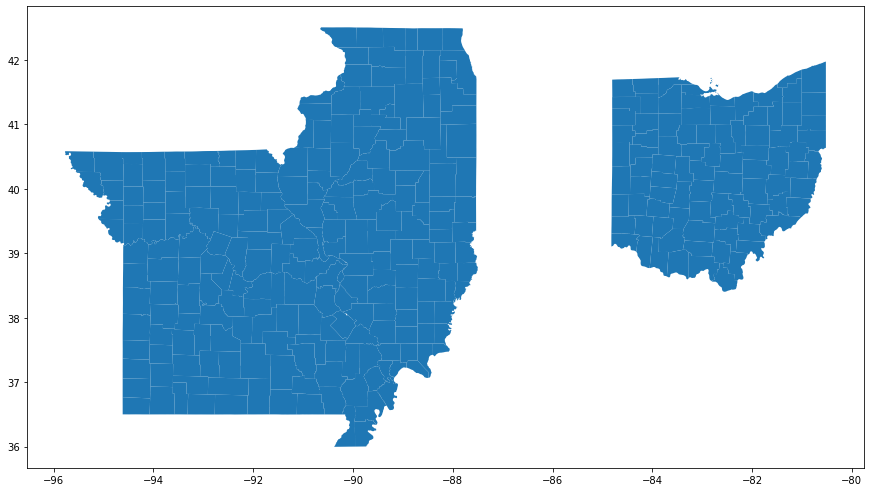

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
df.plot(ax=ax)

plt.show()

Merge in the full data:

In [9]:
merged = pd.read_csv("../Data/merged.csv", parse_dates=["date"], dtype={'fips': str})
print(merged.shape, df.shape)
full = merged.merge(df, on="fips", how="inner")
full.head()

(128854, 88) (305, 2)


,state,fips,county,date,cumulative_cases,cumulative_deaths,new_cases,new_deaths,new_cases_7avg,new_deaths_7avg,...,retail_rec,grocery_pharm,parks,transit,workplace,residential,new doses,cumulative doses,cases_next_week,geometry
0,IL,17001,Adams,2020-03-20,1.0,0.0,1.0,0.0,1.0,0.0,...,-33.0,11.0,NaN,-7.0,-22.0,13.0,0.0,0.0,0.0,"POLYGON ((-91.50534 40.20028, -91.49184 40.200..."
1,IL,17001,Adams,2020-03-21,1.0,0.0,0.0,0.0,0.0,0.0,...,-55.0,-14.0,NaN,-30.0,-15.0,NaN,0.0,0.0,0.0,"POLYGON ((-91.50534 40.20028, -91.49184 40.200..."
2,IL,17001,Adams,2020-03-22,1.0,0.0,0.0,0.0,0.0,0.0,...,-63.0,-42.0,NaN,NaN,-25.0,NaN,0.0,0.0,0.0,"POLYGON ((-91.50534 40.20028, -91.49184 40.200..."
3,IL,17001,Adams,2020-03-23,1.0,0.0,0.0,0.0,0.0,0.0,...,-49.0,-20.0,NaN,-21.0,-29.0,14.0,0.0,0.0,0.0,"POLYGON ((-91.50534 40.20028, -91.49184 40.200..."
4,IL,17001,Adams,2020-03-24,1.0,0.0,0.0,0.0,0.0,0.0,...,-46.0,-20.0,NaN,NaN,-31.0,15.0,0.0,0.0,0.0,"POLYGON ((-91.50534 40.20028, -91.49184 40.200..."


### See geo-distribution of important features

In [10]:
full.columns

Index(['state', 'fips', 'county', 'date', 'cumulative_cases',
       'cumulative_deaths', 'new_cases', 'new_deaths', 'new_cases_7avg',
       'new_deaths_7avg', '2weeksago_cases_7avg', '2weeksago_deaths_7avg',
       'total_pop', 'male', 'perc_male', 'female', 'perc_female', 'age_15_19',
       'p_age_15_19', 'age_20_24', 'p_age_20_24', 'age_25_34', 'p_age_25_34',
       'age_35_44', 'p_age_35_44', 'age_45_54', 'p_age_45_54', 'age_55_59',
       'p_age_55_59', 'age_60_64', 'p_age_60_64', 'age_median', 'age_62over',
       'p_age_62over', 'age_65over', 'p_age_65over', 'white', 'p_white',
       'black', 'p_black', 'native', 'p_native', 'asian', 'p_asian',
       'hawaiian', 'p_hawaiian', 'other_race', 'p_other_race', 'hispanic',
       'p_hispanic', 'housing_units', 'below_50_pov', 'below_125_pov',
       'below_150_pov', 'below_185_pov', 'below_200_pov', 'below_300_pov',
       'below_400_pov', 'below_500_pov', 'below_pov', 'male_below_pov',
       'female_below_pov', 'age_under14', 'p

Number of Cases at US Peak (January 8, 2021)

<ipython-input-11-1bb28831f844>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map1["cases_per_pop"] = map1['new_cases_7avg']/map1["total_pop"]


Text(0.5, 1.0, 'Cases on Jan 8,2021 by County')

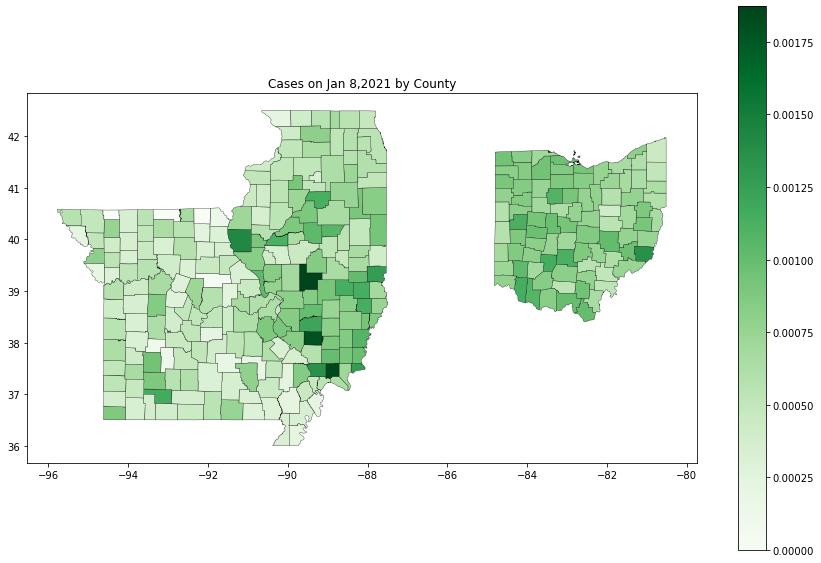

In [11]:
import datetime 

map1 = full[full["date"] == "01/08/2021"]
map1["cases_per_pop"] = map1['new_cases_7avg']/map1["total_pop"]
map1 = map1[['cases_per_pop', "fips", "geometry"]]
#map1
map1 = gpd.GeoDataFrame(map1)

fig,ax = plt.subplots(figsize=(15,10))
map1.plot(ax=ax,
           column= 'cases_per_pop',
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           cmap="Greens")
plt.title("Cases on Jan 8,2021 by County")

Movement in Retail and Recreation on January 8, 2021

Text(0.5, 1.0, 'Mobility on Jan 8,2021 by County with Light Blue Signifying Missing')

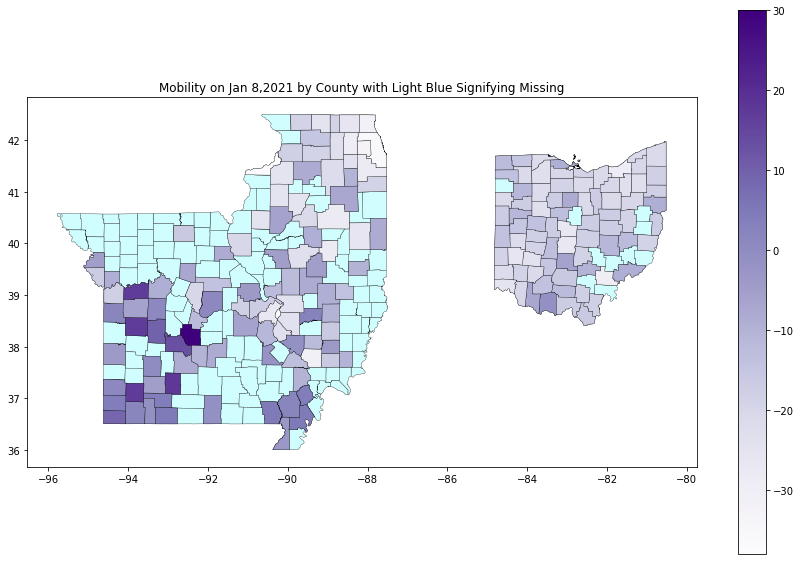

In [12]:
map3 = full[full["date"] == "01/08/2021"]
#map3["retail_rec"] = map3['new_cases_7avg']
map3 = map3[['retail_rec', "fips", "geometry"]]

map3 = gpd.GeoDataFrame(map3)

fig,ax = plt.subplots(figsize=(15,10))
out_map = df.plot(ax=ax,
                color='#d0fefe',
                legend=True,
                edgecolor='black',
                linewidth=0.3)

outmap = map3.plot(ax=ax,
           column= 'retail_rec',
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           cmap="Purples")
plt.title("Mobility on Jan 8,2021 by County with Light Blue Signifying Missing")

Percent of Population Hospitalized on the Peak Jan 8, 2021

<ipython-input-13-fe6e99507d2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map5["hosp_per_pop"] = map5['total_adult_hospitalizations']/map5["total_pop"]


Text(0.5, 1.0, 'Cumulative Cases on January 8, 2021 by County')

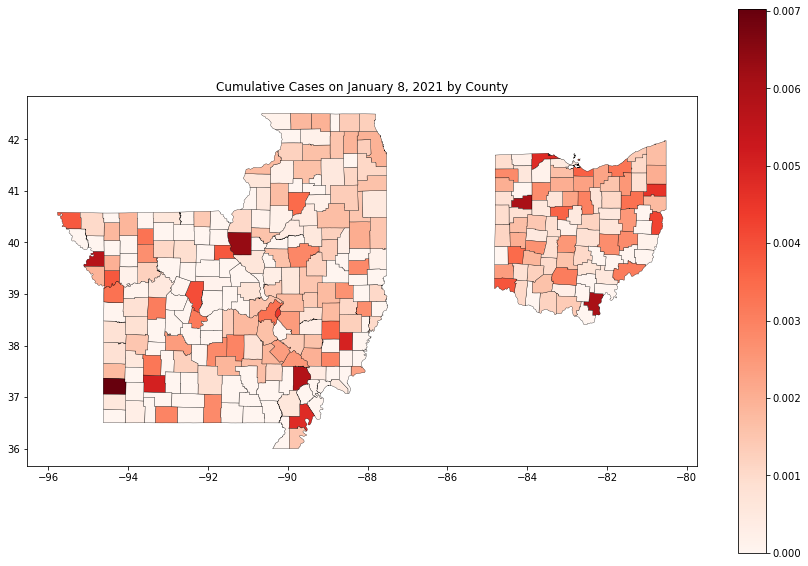

In [13]:
map5 = full[full["date"] == "01/08/2021"]
map5["hosp_per_pop"] = map5['total_adult_hospitalizations']/map5["total_pop"]
map5 = map5[['hosp_per_pop', "fips", "geometry"]]
#map1
map5 = gpd.GeoDataFrame(map5)

fig,ax = plt.subplots(figsize=(15,10))
map5.plot(ax=ax,
           column= 'hosp_per_pop',
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           cmap="Reds")
plt.title("Cumulative Cases on January 8, 2021 by County")

Cumulative Doses on Last Day in Data - May 27, 2021

<ipython-input-14-00d3bdf486dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map6["cumulative_doses_per_pop"] = map6['cumulative doses']/map6["total_pop"]


Text(0.5, 1.0, 'Cumulative Cases on May 27, 2021 by County')

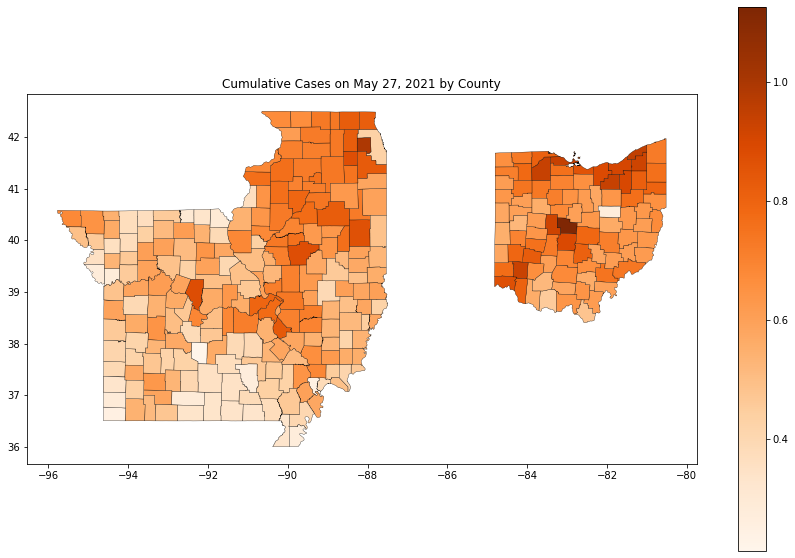

In [14]:
#cumulative doses
map6 = full[full["date"] == "05/20/2021"]
map6["cumulative_doses_per_pop"] = map6['cumulative doses']/map6["total_pop"]
map6 = map6[['cumulative_doses_per_pop', "fips", "geometry"]]
#map1
map6 = gpd.GeoDataFrame(map6)

fig,ax = plt.subplots(figsize=(15,10))
map6.plot(ax=ax,
           column= 'cumulative_doses_per_pop',
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           cmap="Oranges")
plt.title("Cumulative Cases on May 27, 2021 by County")

Cumulative Cases on Last Day in Data - May 27, 2021

<ipython-input-20-52895c2aec8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map4["cumulative_deaths_per_pop"] = map4['cumulative_deaths']/map4["total_pop"]


Text(0.5, 1.0, 'Cumulative Cases on May 27, 2021 by County')

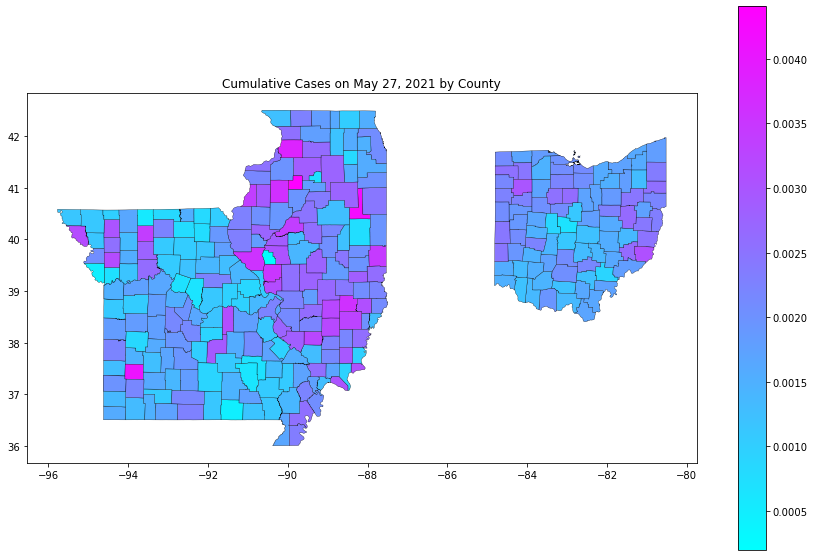

In [20]:
map4 = full[full["date"] == "05/27/2021"]
map4["cumulative_deaths_per_pop"] = map4['cumulative_deaths']/map4["total_pop"]
map4 = map4[['cumulative_deaths_per_pop', "fips", "geometry"]]
#map1
map4 = gpd.GeoDataFrame(map4)

fig,ax = plt.subplots(figsize=(15,10))
map4.plot(ax=ax,
           column= 'cumulative_deaths_per_pop',
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           cmap="cool")
plt.title("Cumulative Cases on May 27, 2021 by County")

Percent of Residents Over 65

Text(0.5, 1.0, 'Percent Over Age 65 by Fips')

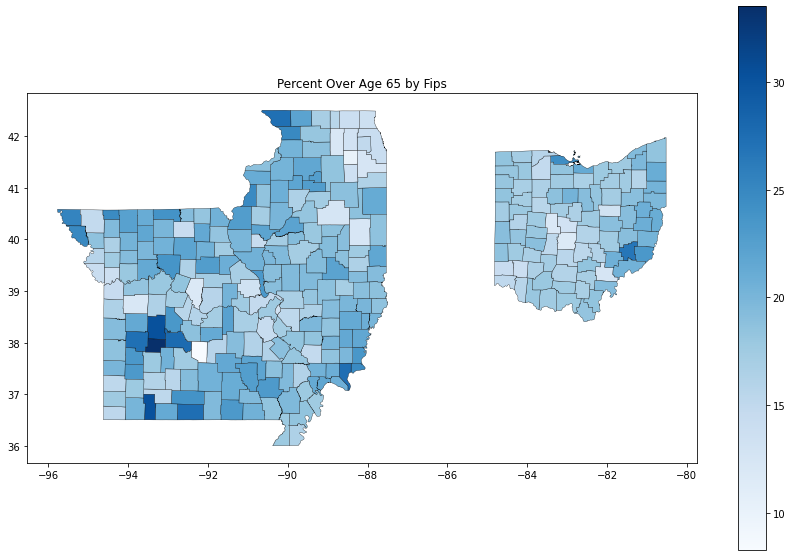

In [16]:
map2 = full[["p_age_65over", "fips", "geometry"]].drop_duplicates().reset_index(drop=True)
map2 = gpd.GeoDataFrame(map2)

fig,ax = plt.subplots(figsize=(15,10))
map2.plot(ax=ax,
           column= "p_age_65over",
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           cmap="Blues")
plt.title("Percent Over Age 65 by Fips")